## A. Data Prepration

### A.1 Import Libbary

In [241]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

### A.2 Import DataFRame

In [242]:
df = pd.read_csv('Salary.csv')

### A.3 Tampilkan 5 DataFrame awal

In [243]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


### A.4 Tampilkan 5 Dataframe terakhit

In [244]:
df.tail()

,YearsExperience,Salary
30,11.2,127345
31,11.5,126756
32,12.3,128765
33,12.9,135675
34,13.5,139465


### A.5 Dimensi pada DataFrame

In [245]:
print(f"Check Dimensi pada Dataframe : {df.shape}")

Check Dimensi pada Dataframe : (35, 2)


## B. Data Preprocessing

### B.1 Informasi pada Dataframe

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 692.0 bytes


### B.2 Jumlah Nilai unik pada setiap kolom

In [247]:
df.nunique()

YearsExperience    33
Salary             35
dtype: int64

### B.3 Menampilkan nilai unik

In [248]:
for col in df:
  print({col : df[col].unique()})

{'YearsExperience': array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.7,  3.9,  4. ,
        4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,  7.9,  8.2,
        8.7,  9. ,  9.5,  9.6, 10.3, 10.5, 11.2, 11.5, 12.3, 12.9, 13.5])}
{'Salary': array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872, 127345, 126756,
       128765, 135675, 139465], dtype=int64)}


### B.4 Check Data Duplicated pada Dataframe

In [249]:
print(f"Check Data Duplicated pada Datafraame : {df.duplicated().sum()}")

Check Data Duplicated pada Datafraame : 0


### B.5 Check Data kosong pada DataFrame

In [250]:
print(f"Check Data Kosong pada DataFrame : {df.isna().sum().sum()}")

Check Data Kosong pada DataFrame : 0


### B.6 Check dan mengatasi outlier

In [251]:
def remove_outlier(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  # batas bawah and batas atas
  lw = Q1 - 1.5 * IQR
  hg = Q3 + 1.5 * IQR
  # outlier
  outlier = df[(df[column] < lw) & (df[column] > hg)]
  return outlier

In [252]:
remove_outlier(df, column='Salary')

,YearsExperience,Salary


### B.7 Deskripsi pada DataFrame

In [253]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,35.0,6.308571,3.618610,1.1,3.45,5.3,9.25,13.5
Salary,35.0,83945.600000,32162.673003,37731.0,57019.00,81363.0,113223.50,139465.0


## C. Expolirasi Data Analis

### C.1 Visualisasi Boxplot

<Axes: >

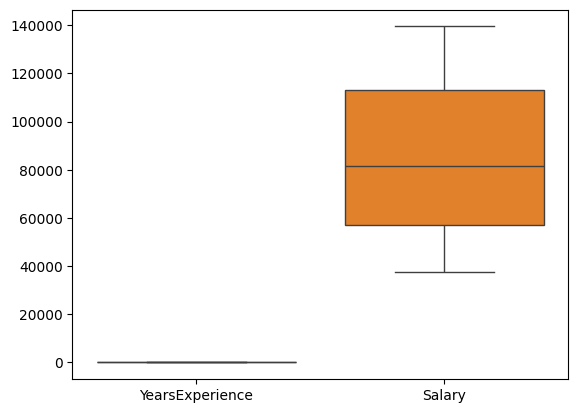

In [254]:
sns.boxplot(df)

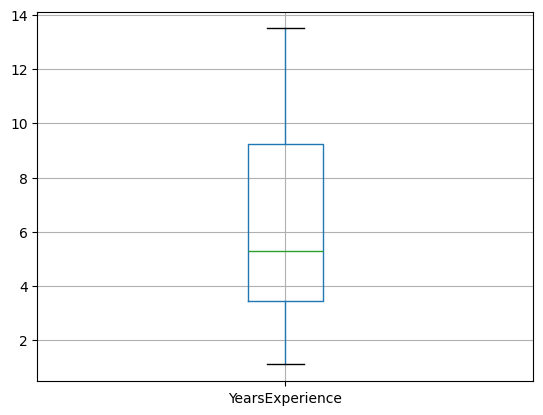

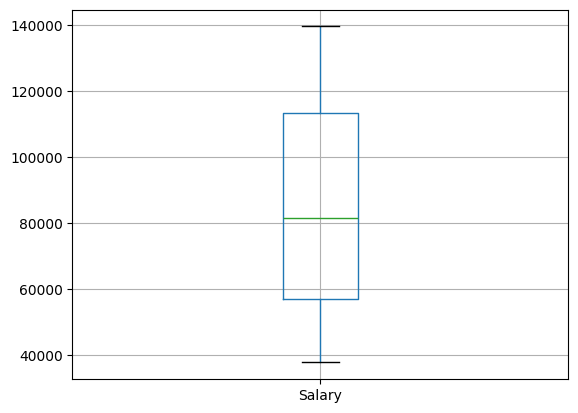

In [255]:
for col in df:
  df.boxplot(column=col)
  plt.show()

### C.2 Visualiasai Hist

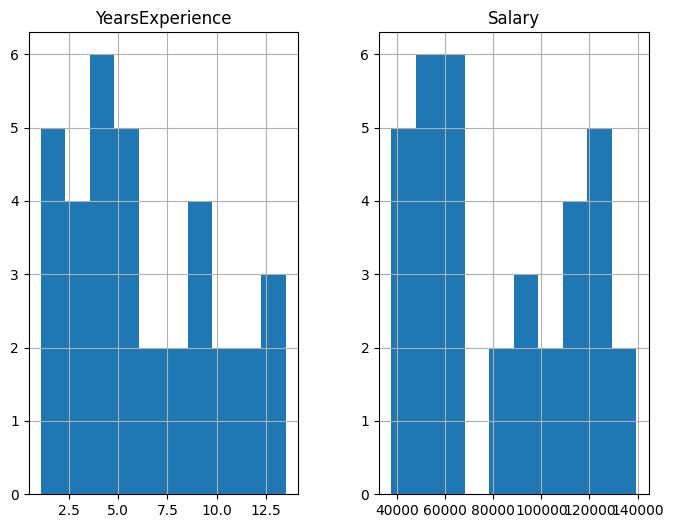

In [256]:
df.hist(figsize=(8, 6))
plt.show()

### C.3 Visualisasi Histogram

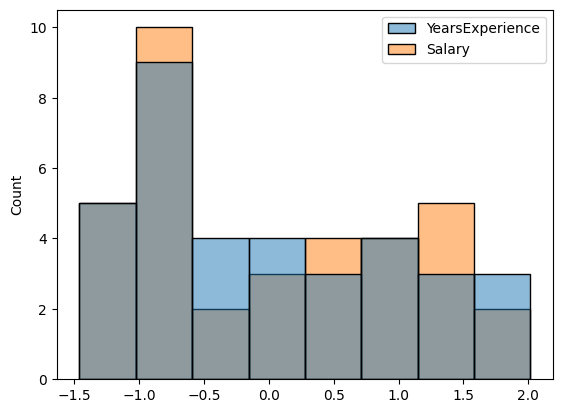

In [257]:
standarized = pd.DataFrame({})

for col in df:
  standarized[col] = (df[col] - np.mean(df[col], axis=0)) / np.std(df[col], axis=0)

sns.histplot(standarized)
plt.show()

### C.4 Visualisasi KDE

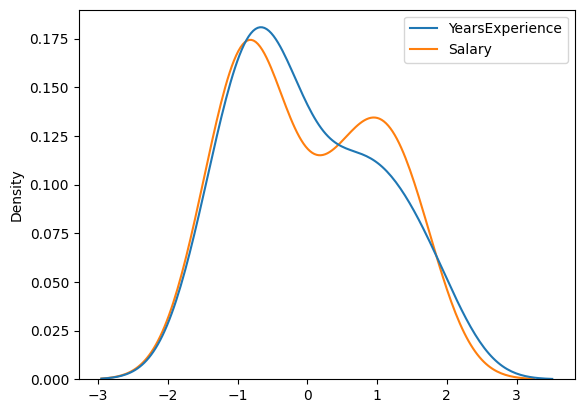

In [258]:
sns.kdeplot(standarized)
plt.show()

### C.5 Visuliasasi Pairplot

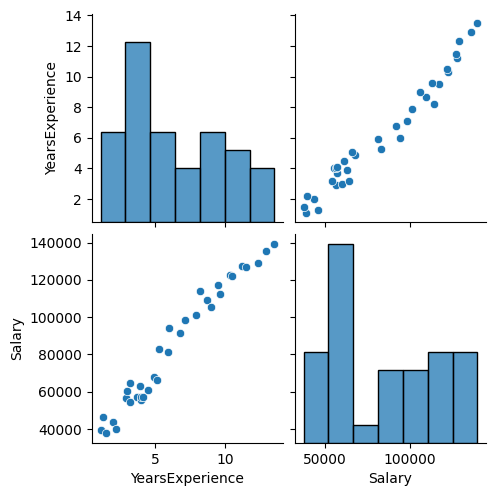

In [259]:
sns.pairplot(df)

### C.6 Visualisasi scatter

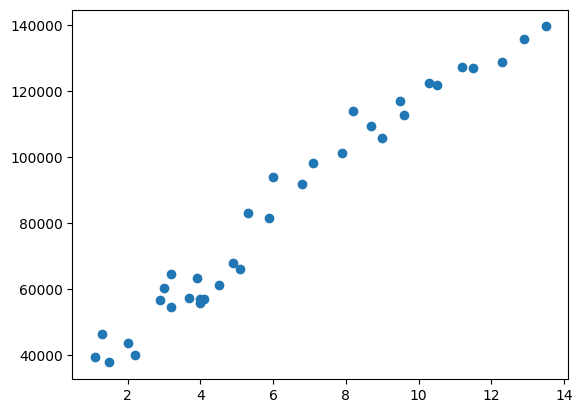

In [260]:
plt.scatter(x='YearsExperience', y= 'Salary', data=df)
plt.show()

### C.7 Visualualisasi Heatmap

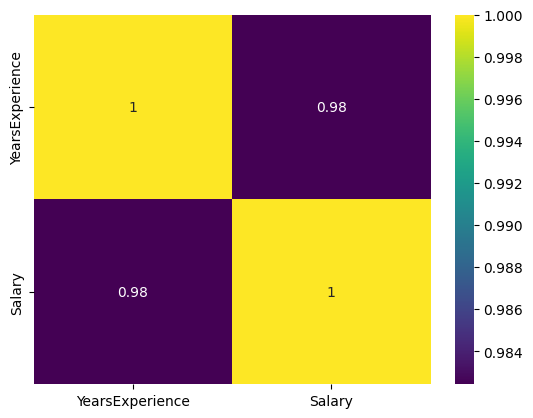

In [261]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

## D. Pemodelan Dataframe

### D.1 Mentukan Indepent dan Dependet

In [262]:
X = df.iloc[: ,0]
y = df.iloc[:, 1]

In [263]:
y

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
30    127345
31    126756
32    128765
33    135675
34    139465
Name: Salary, dtype: int64

### D.2 Ubah ke array

In [264]:
# X = np.array(X)
# y = np.array(y)

### D.3 Featur Scaling min and max

In [265]:
# def scalling(x):
#   return (x - x.min() / x.max() - x.min())

In [266]:
# x = scalling(X)

### D.4 Split Data biasa

In [267]:
np.random.seed(42)
train_size = int(len(X) * 0.8)
idx = np.random.permutation(len(X))

x_train, x_test  = X.iloc[idx[:train_size]], X.iloc[idx[train_size:]]
y_train, y_test = y.iloc[idx[:train_size]], y.iloc[idx[train_size:]]

### D.5 Hasil Data Training and Data Testing

In [268]:
print(f"Hasil Data Training : {x_train.shape}, {y_train.shape}")
print(f"Hasil Data Testing : {x_test.shape}, {y_test.shape}")

Hasil Data Training : (28,), (28,)
Hasil Data Testing : (7,), (7,)


## E. Algoritma Simple linear regression

### E.1 Mengihitung Slope and Weights

In [269]:
slope = (len(X) * np.sum(X * y) - np.sum(X) * np.sum(y)) / (len(X) * np.sum(X**2) - np.sum(X) ** 2)
weights = (np.sum(y) - slope * np.sum(X)) / len(X)

### E.2 Hasil Slope adn Weights

In [270]:
print(f"Hasil Slope adalah : {slope}")
print(f"Hasil weights adalah : {weights}")

Hasil Slope adalah : 8731.941047062495
Hasil weights adalah : 28859.526194531452


### E.3 Prediksi

In [271]:
y_pred = round(weights + slope * x_test)

In [272]:
print(f"Hasil Prediski : {y_pred}")

Hasil Prediski : 25    107447.0
6      55055.0
20     88237.0
34    146741.0
7      56802.0
14     68153.0
28    118799.0
Name: YearsExperience, dtype: float64


In [273]:
# y_pred_potong = y_pred[:1]

### E.4 Evaluasi Model

In [274]:
r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean()) **2))
print(f"Hasil Evaluasi Model : {r2}")

Hasil Evaluasi Model : 0.9758206152100048


### E.5 MSE

In [275]:
mse = np.mean((y_test - y_pred)**2)
print(f"Hasil MSE : {mse}")

Hasil MSE : 23240300.57142857


### E.6 MAE

In [276]:
mae = np.mean(np.abs(y_test - y_pred))
print(f"Hasil MAE : {mae}")

Hasil MAE : 4389.714285714285


### E.7 Visualsasi Plot

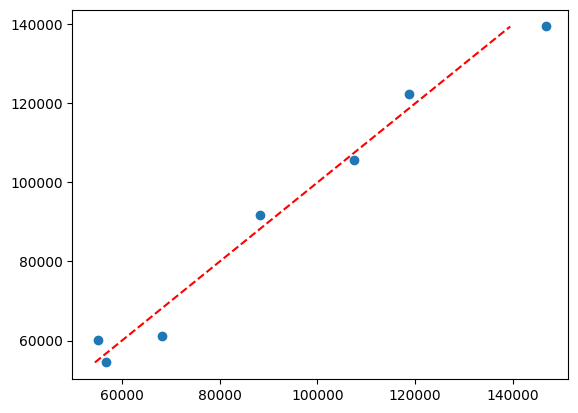

In [277]:
plt.scatter(y_pred, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'--r')
plt.show()